Dimensionality reduction and cluster analysis of the data

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import anndata
adata = anndata.read_h5ad('../Data/Brain_AllenData.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 978067 × 550
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'normalization', 'parent', 'parent_layer'


In [2]:
#Downsample the cells to a subset of 10,000 random cells

slices = adata.obs['Slice'].unique().tolist()
print(slices)
random_number = np.random.randint(0, len(slices) - 1)
random_slice = slices[random_number]
print(random_slice)
sample = adata[adata.obs['Slice'] == 'C57BL6J-638850.10']
print(sample)

['C57BL6J-638850.01', 'C57BL6J-638850.05', 'C57BL6J-638850.10', 'C57BL6J-638850.14', 'C57BL6J-638850.18', 'C57BL6J-638850.26', 'C57BL6J-638850.30', 'C57BL6J-638850.35', 'C57BL6J-638850.39', 'C57BL6J-638850.44', 'C57BL6J-638850.48', 'C57BL6J-638850.52', 'C57BL6J-638850.57', 'C57BL6J-638850.61', 'C57BL6J-638850.67']
C57BL6J-638850.26
View of AnnData object with n_obs × n_vars = 42563 × 550
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'normalization', 'parent', 'parent_layer'


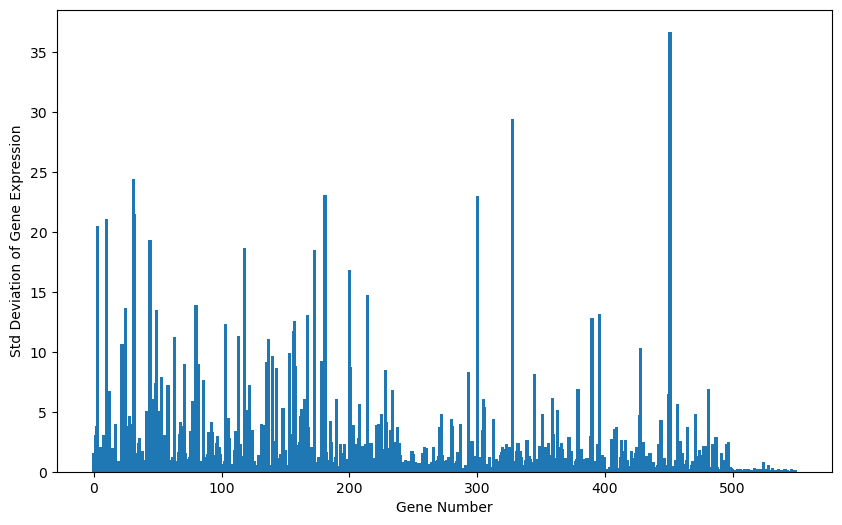

In [3]:
#Look at standard deviations of gene expression levels across the sample

std_deviation = np.std(sample.X.toarray(), axis=0)

x = np.arange(len(std_deviation))  # Create an array of indices
y = std_deviation  # Your array values

plt.figure(figsize=(10, 6))
plt.bar(x, y, width=2.5)
plt.xlabel('Gene Number')
plt.ylabel('Std Deviation of Gene Expression')
plt.show()

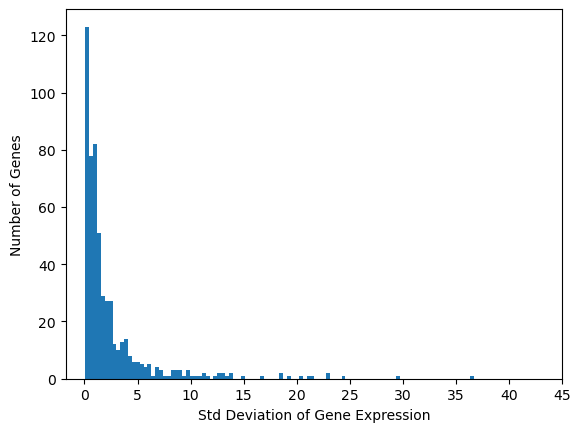

In [4]:
#Plot a histogram of the standard deviations

plt.hist(std_deviation, bins=100)  # Adjust the number of bins as needed
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Std Deviation of Gene Expression')
plt.ylabel('Number of Genes')
plt.show()

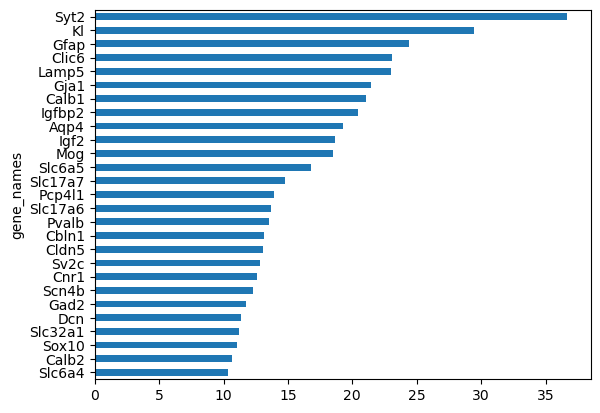

In [5]:
#Make a list of the genes with a significant variance (std dev > 10)

df = pd.DataFrame({
    'gene_names': sample.var['gene_symbol'],
    'std_deviation': std_deviation    
})

df = df.sort_values('std_deviation', ascending=False)

dftop = df[df['std_deviation'] > 10]

fig, ax = plt.subplots()
dftop.plot(kind='barh', x='gene_names', y='std_deviation', ax=ax)
ax.invert_yaxis()
ax.legend().remove()
plt.show()

In [6]:
# Step 1: Identify the indices of the genes in dftop
gene_names_top = dftop['gene_names'].values  # Assuming 'gene_names' is the column with gene names
gene_indices_top = [i for i, gene in enumerate(sample.var['gene_symbol']) if gene in gene_names_top]

# Step 2: Subset the original AnnData object
X_top = sample[:, gene_indices_top].X  # Extract the expression matrix for the selected genes

# Step 3: Create a new AnnData object
top_genes = anndata.AnnData(X=X_top, obs=sample.obs, var=sample.var.iloc[gene_indices_top])

print(top_genes)

AnnData object with n_obs × n_vars = 42563 × 27
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'


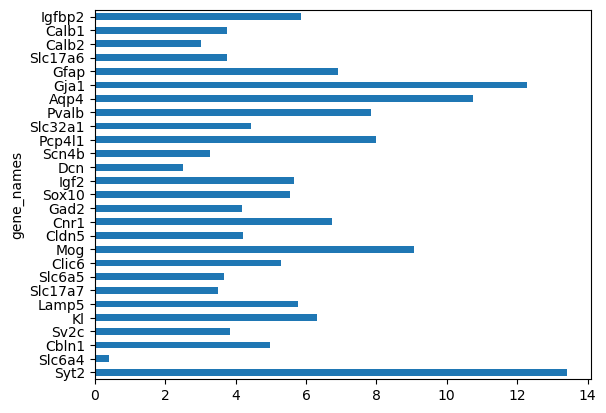

In [7]:
avg_expression = np.mean(top_genes.X.toarray(), axis=0)

df = pd.DataFrame({
    'gene_names': top_genes.var['gene_symbol'],
    'avg_expression': avg_expression    
})

fig, ax = plt.subplots()
df.plot(kind='barh', x='gene_names', y='avg_expression', ax=ax)
ax.invert_yaxis()
ax.legend().remove()
plt.show()

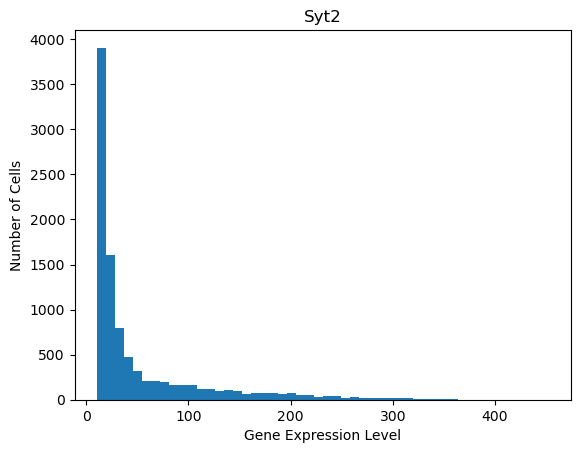

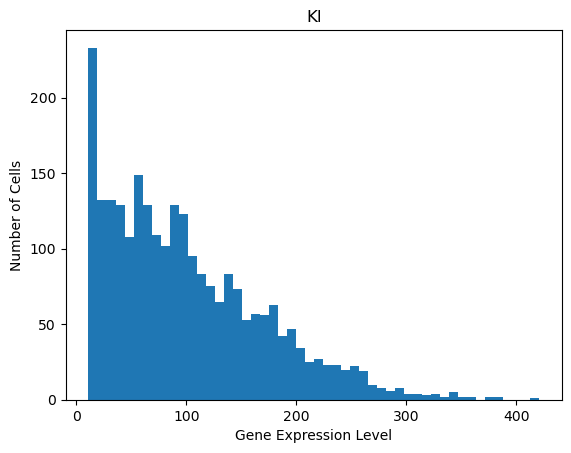

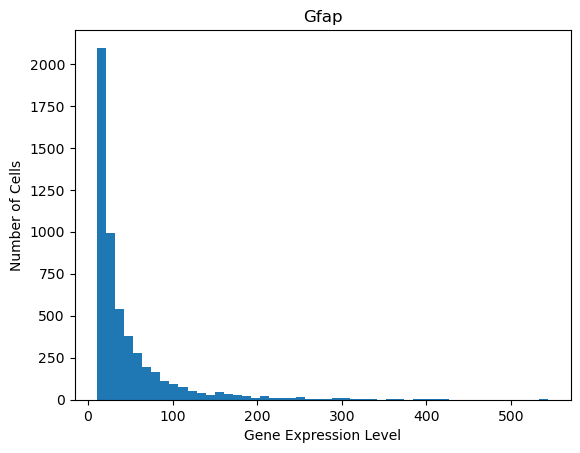

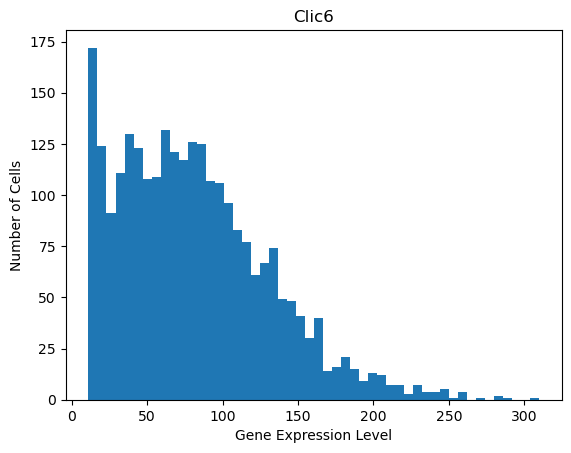

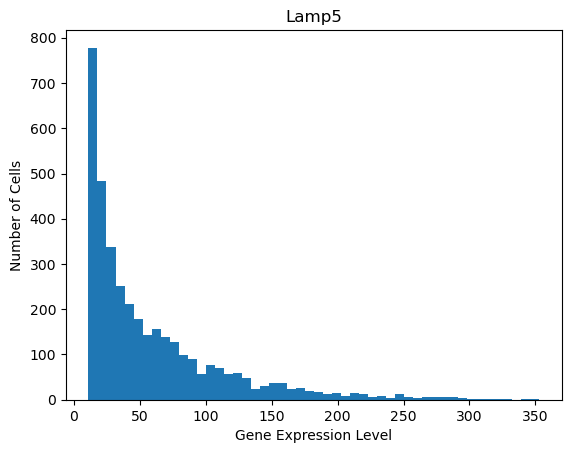

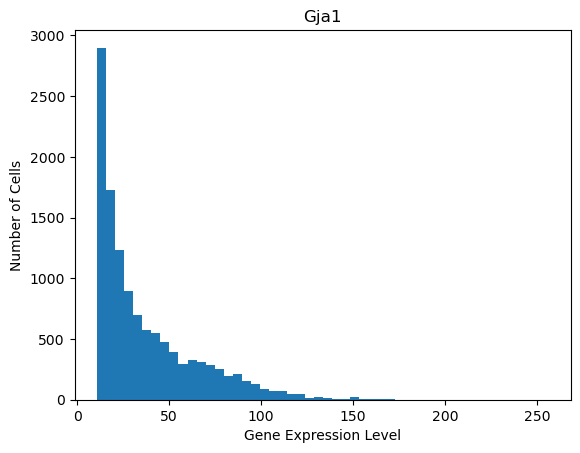

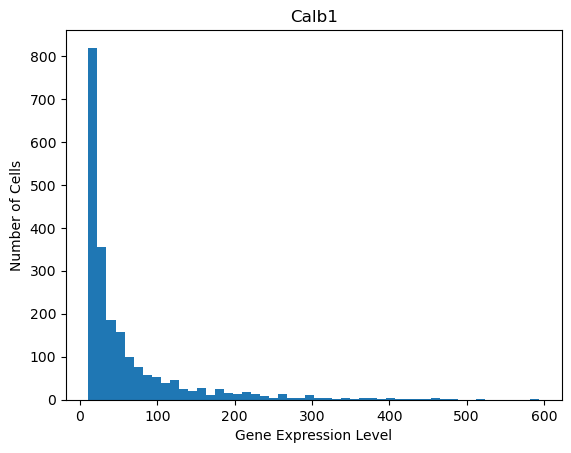

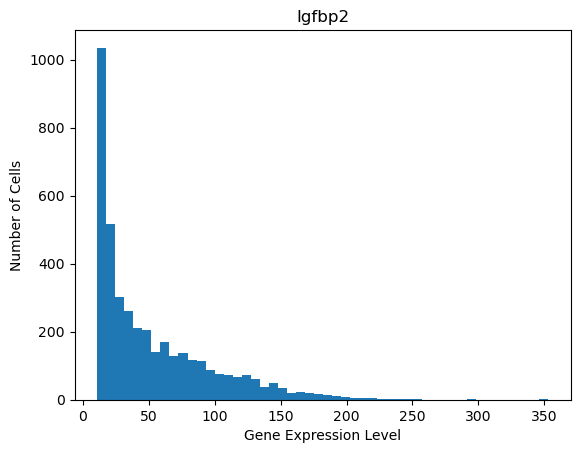

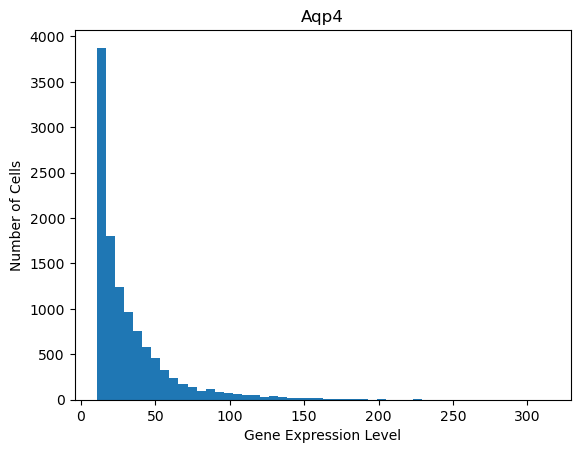

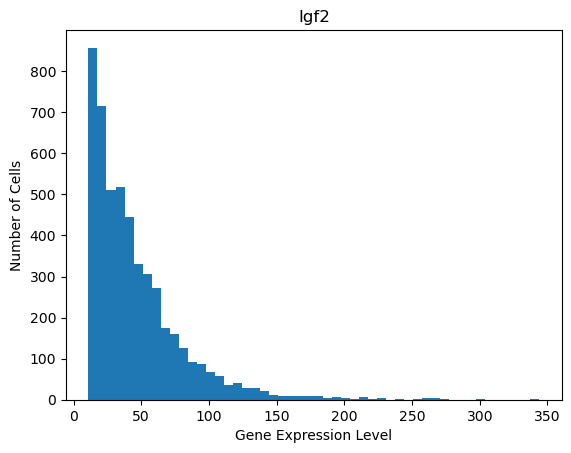

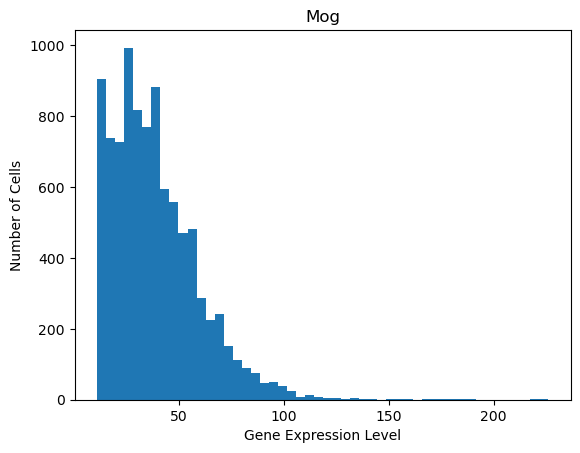

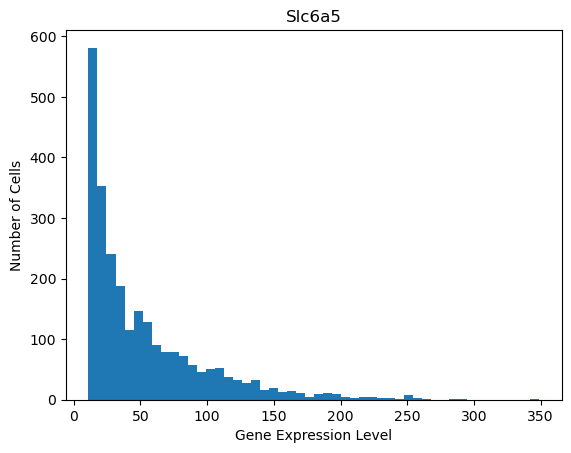

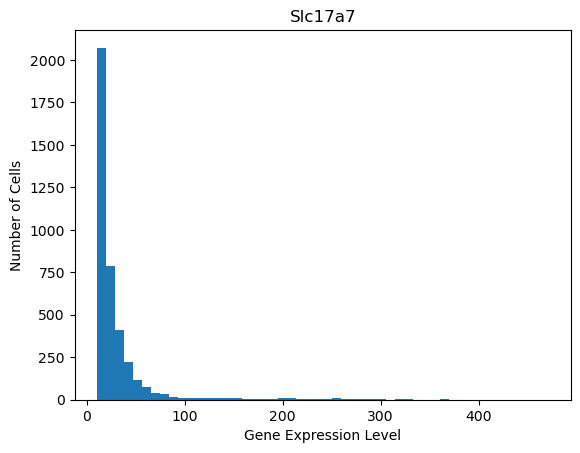

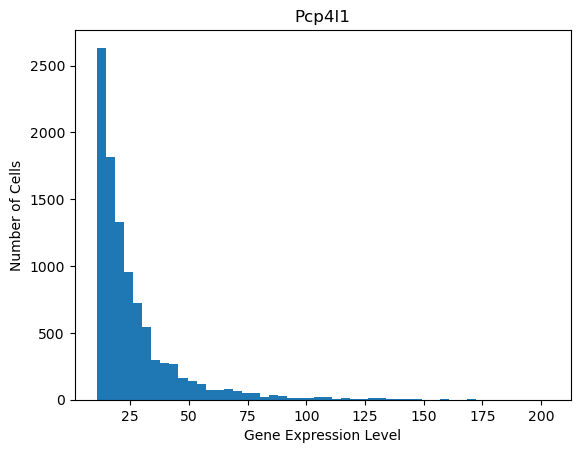

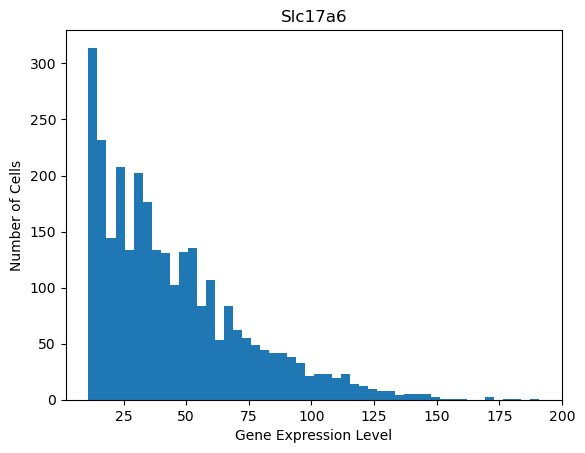

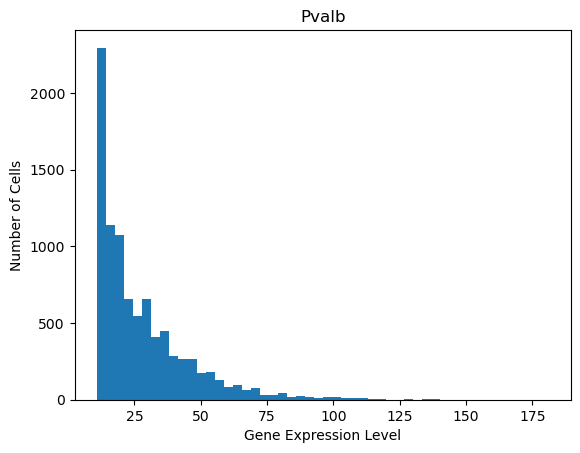

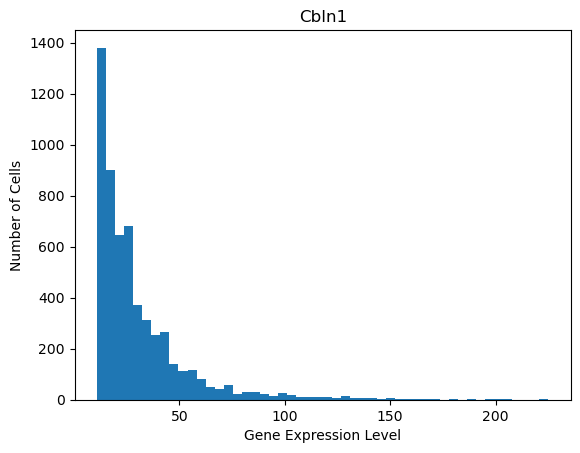

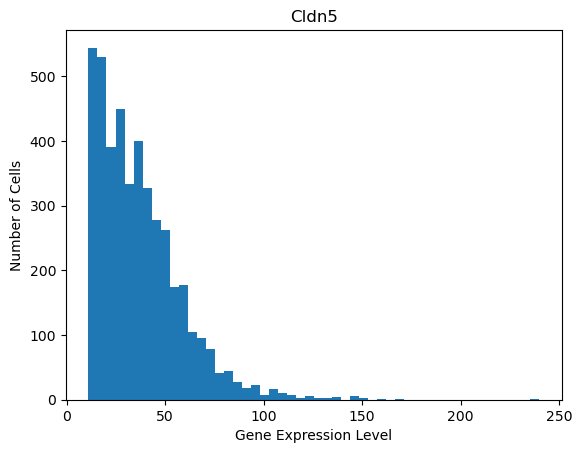

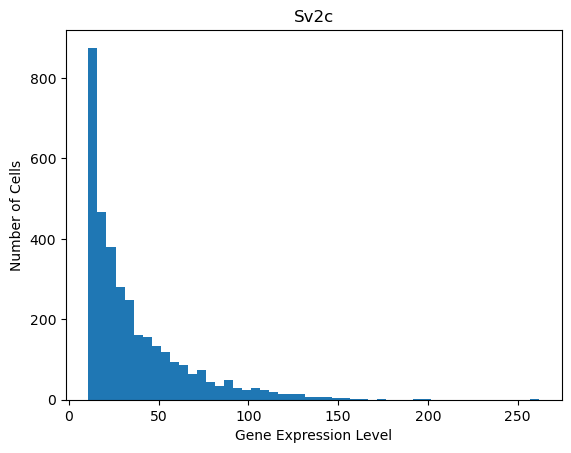

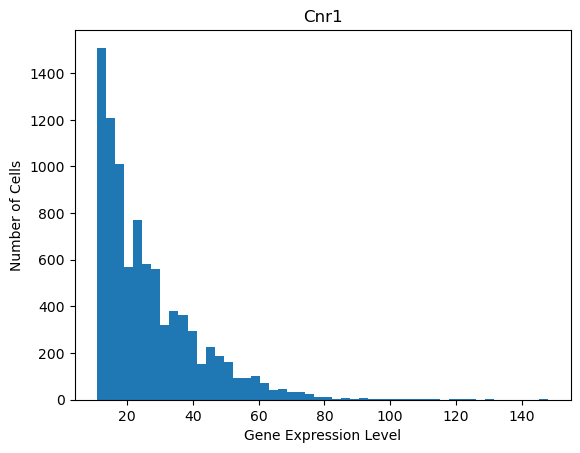

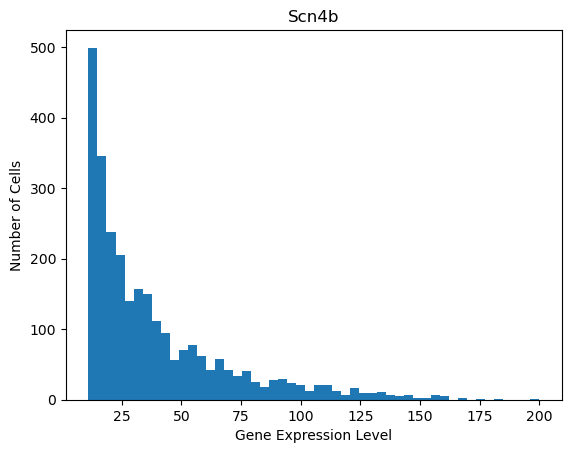

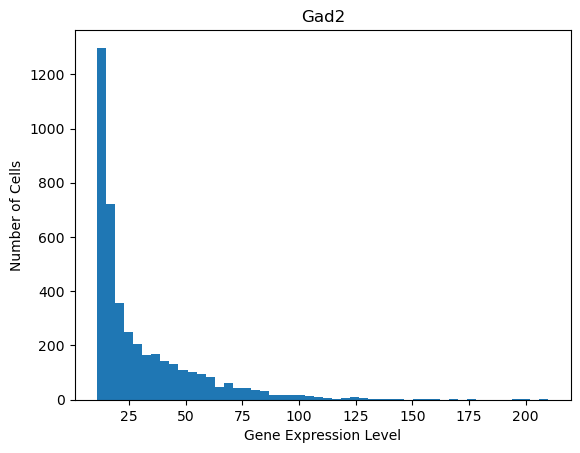

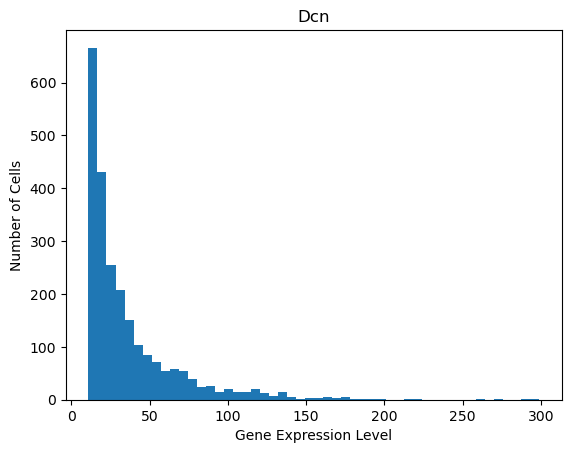

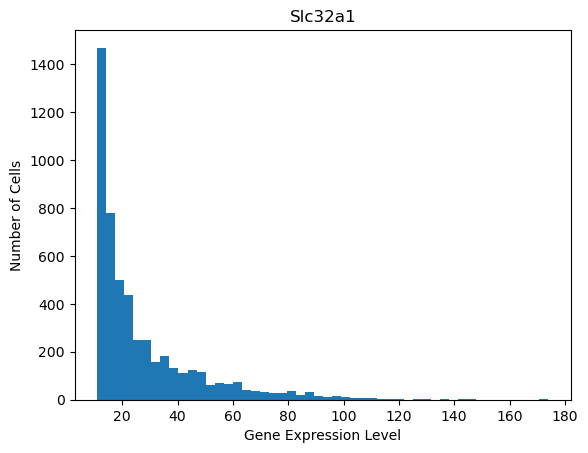

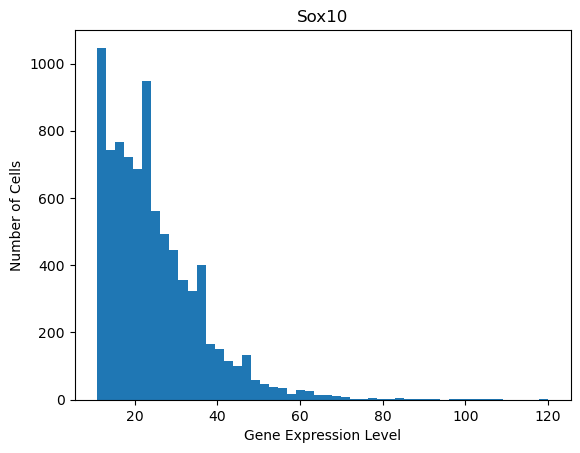

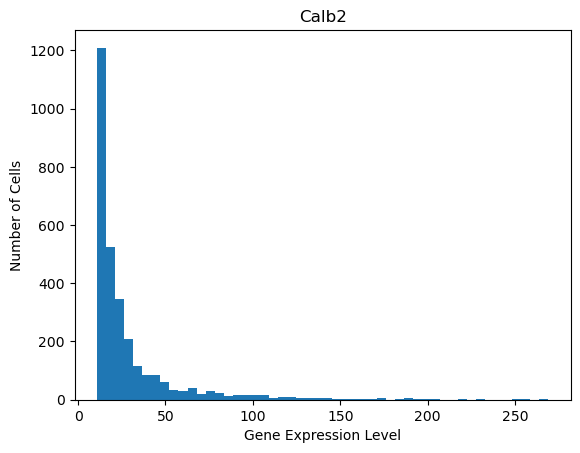

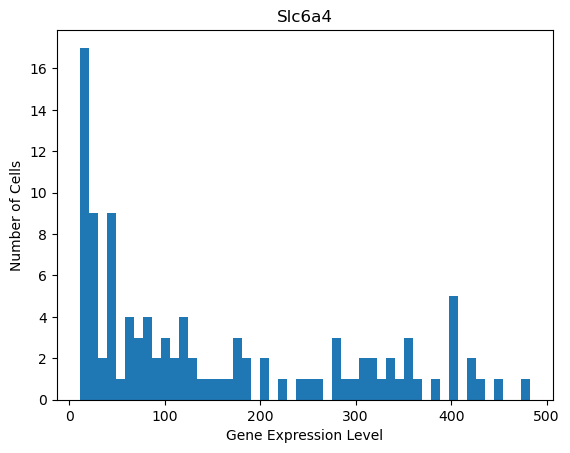

In [8]:
for index, row in dftop.iterrows():
    # Now you can access data in 'row' using column names
    # For example, to get the gene name and its standard deviation:
    gene_name = row['gene_names']
    gene_index = np.where(sample.var['gene_symbol'] == gene_name)[0]
  
      # Step 2: Extract the expression data for this gene
    gene_expression = sample.X[:, gene_index].toarray().flatten()
    gene_expression = gene_expression[gene_expression > 10]

    plt.hist(gene_expression, bins=50)  # Adjust the number of bins as needed
    plt.xlabel('Gene Expression Level')
    plt.ylabel('Number of Cells')
    plt.title(gene_name)
    plt.show()

Sox10, Mog, and Clic6

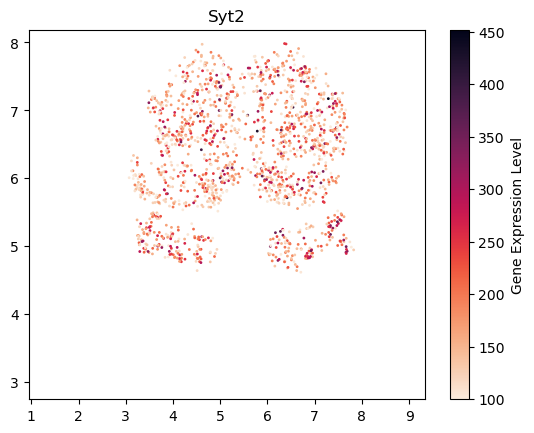

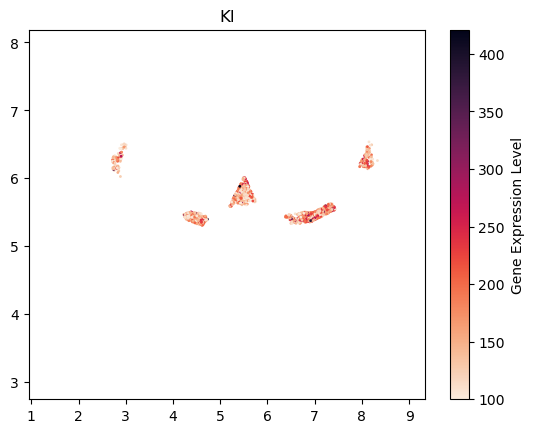

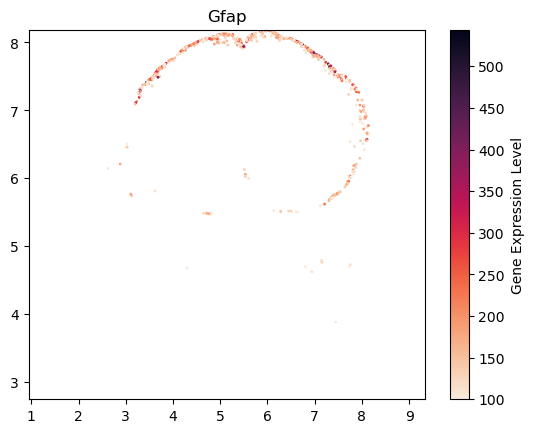

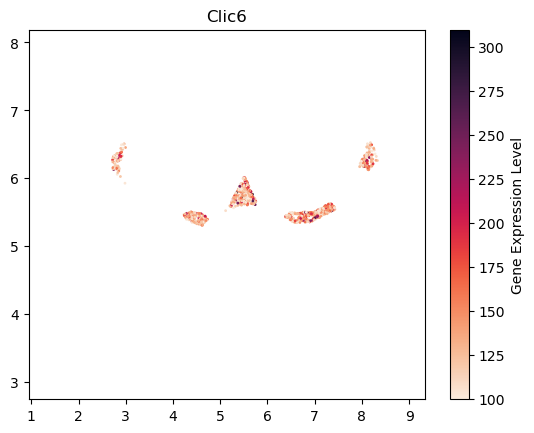

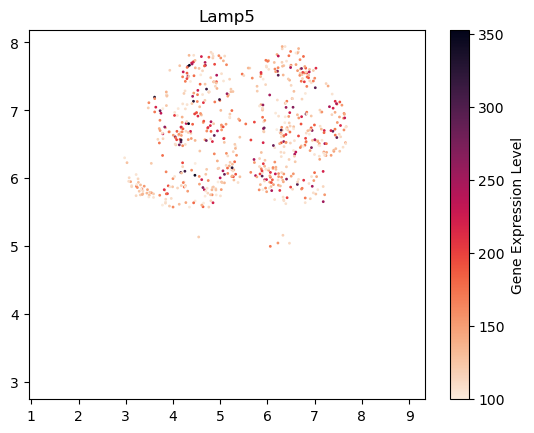

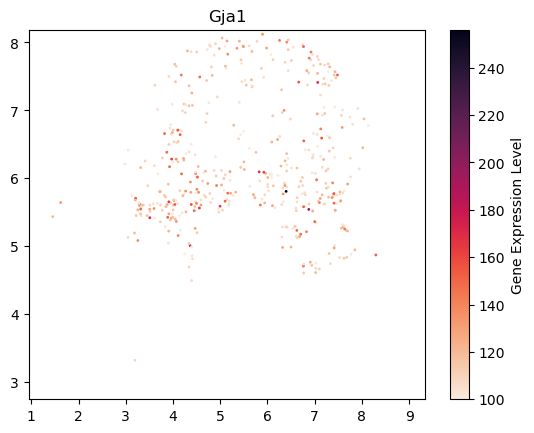

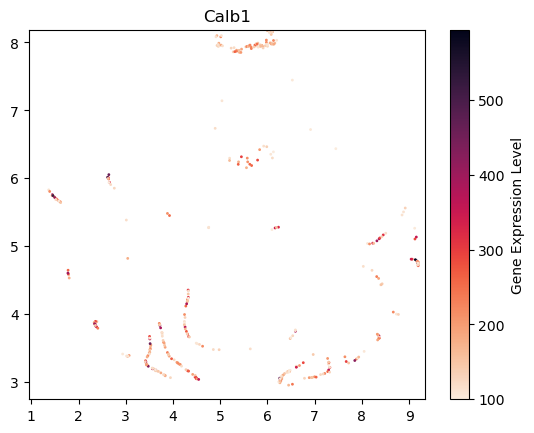

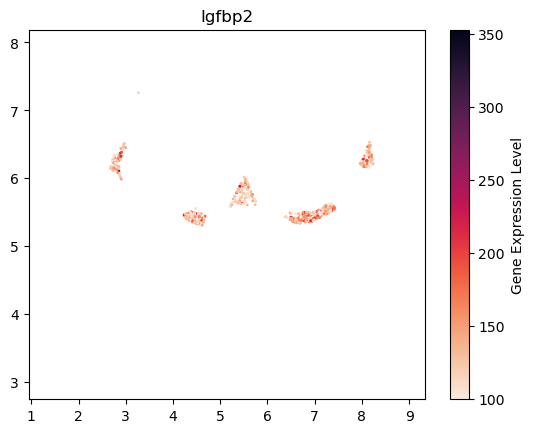

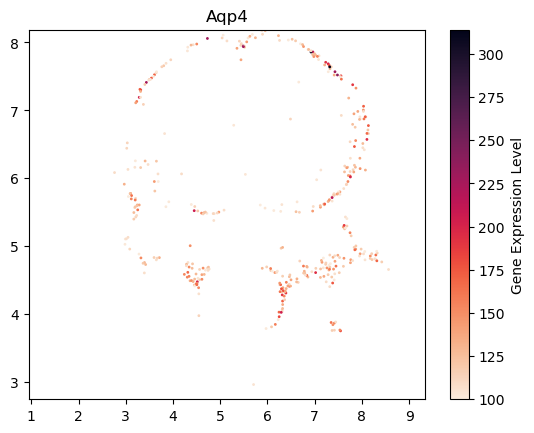

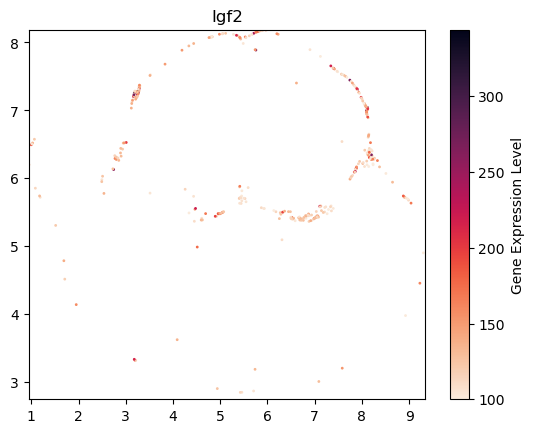

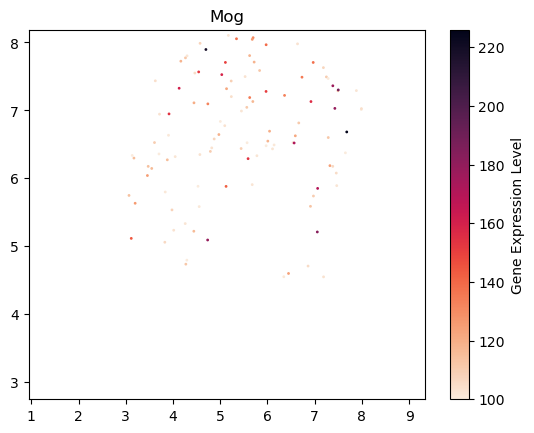

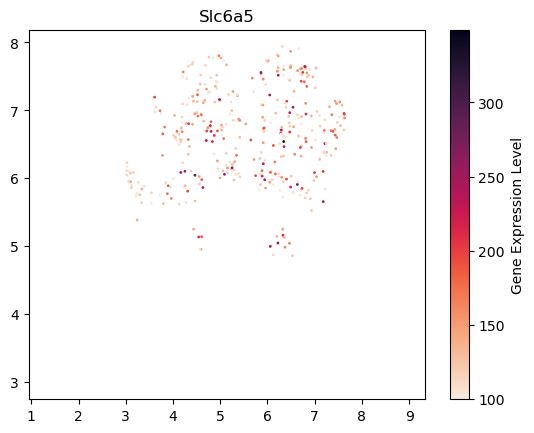

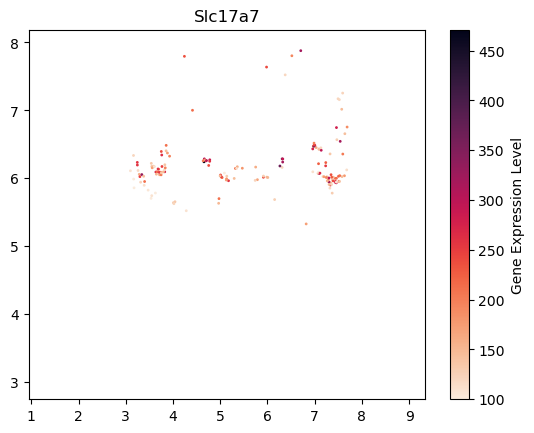

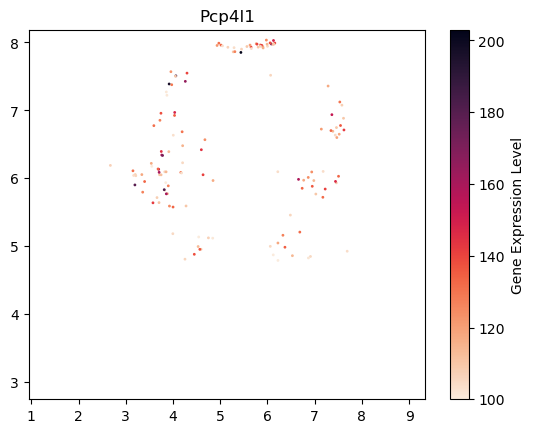

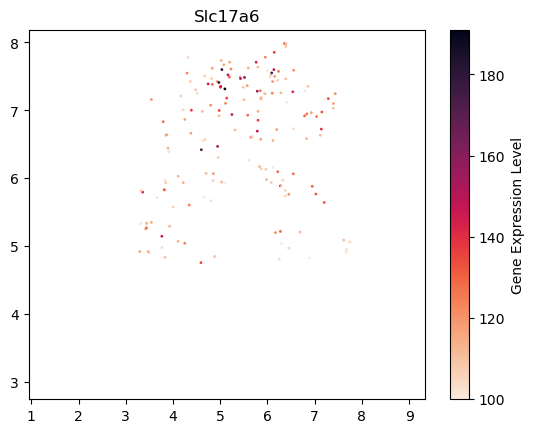

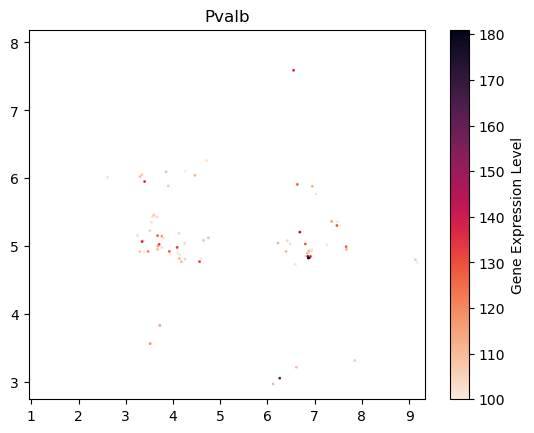

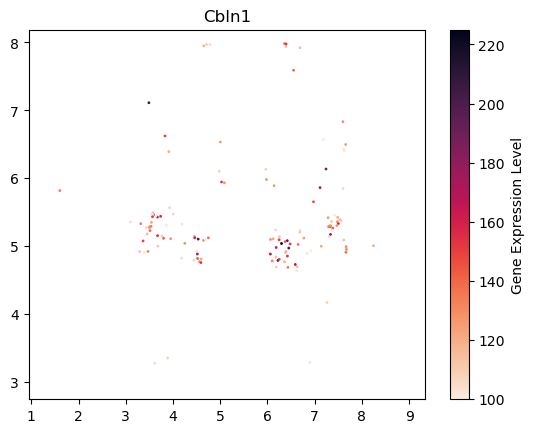

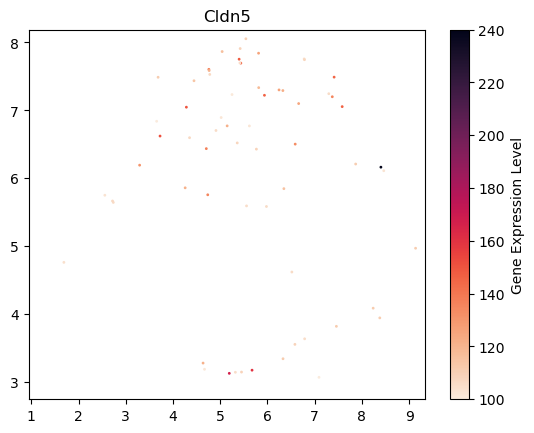

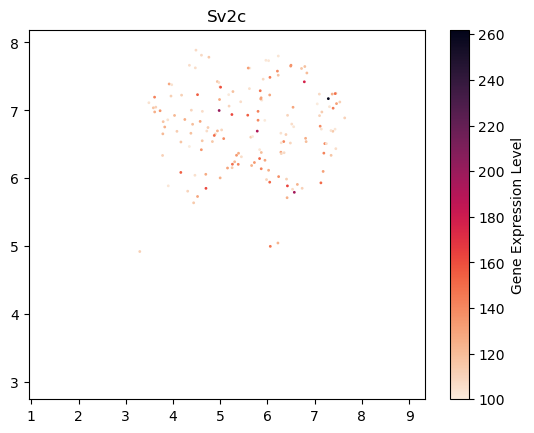

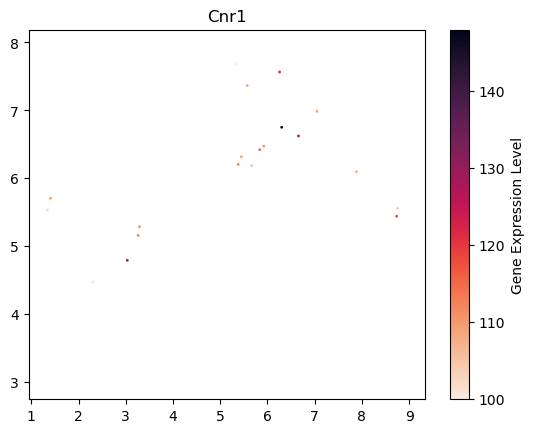

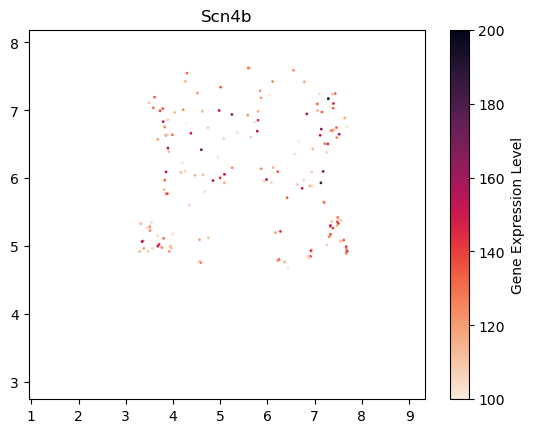

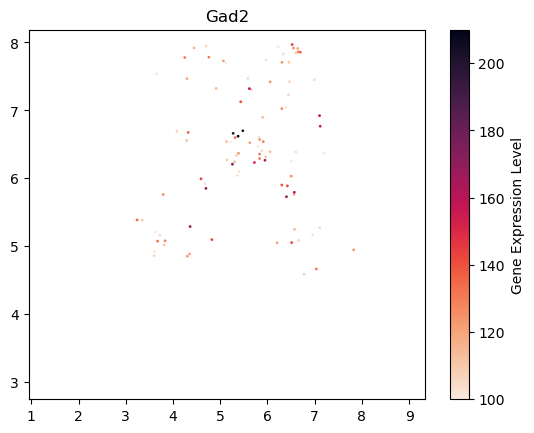

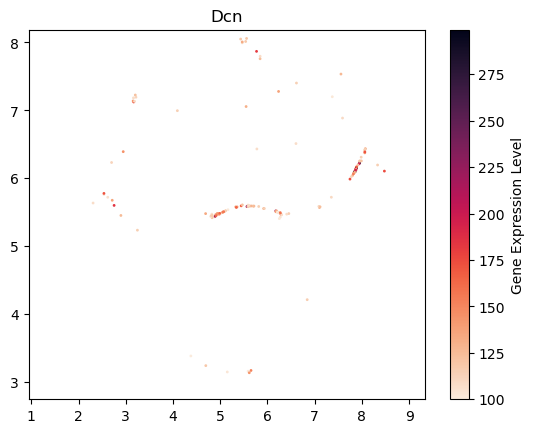

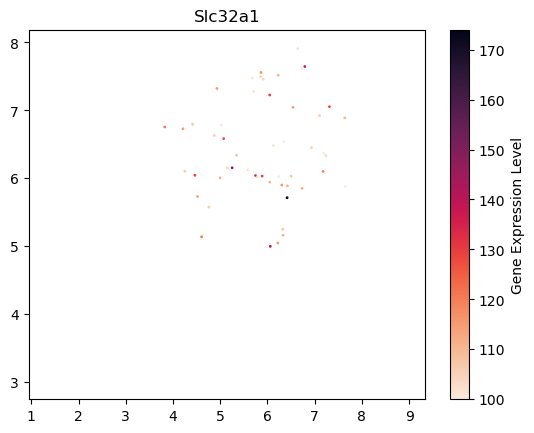

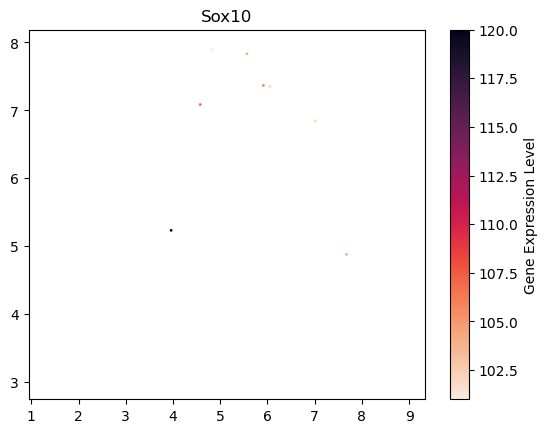

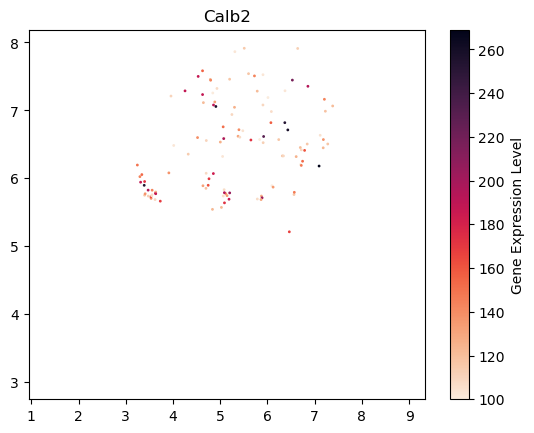

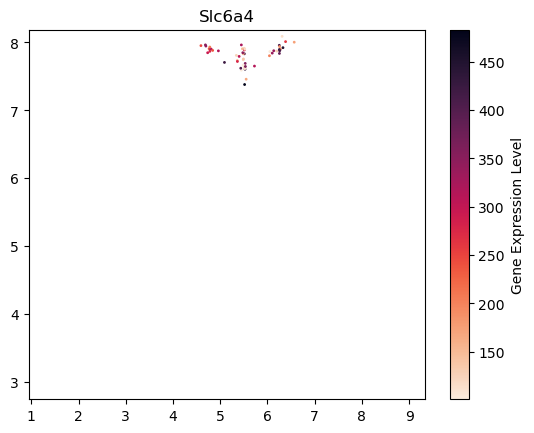

In [9]:
# Assuming 'x', 'y', and 'z' are column names in sample.obs for the spatial coordinates
x_coordinates = sample.obs[['x']]
y_coordinates = sample.obs[['y']]

# Determine the bounds for your plots
x_min, x_max = x_coordinates.min().iloc[0], x_coordinates.max().iloc[0]
y_min, y_max = y_coordinates.min().iloc[0], y_coordinates.max().iloc[0]

# Step 1: Identify the column index of the gene

for index, row in dftop.iterrows():
  # Now you can access data in 'row' using column names
  # For example, to get the gene name and its standard deviation:
  gene_name = row['gene_names']
  gene_index = np.where(sample.var['gene_symbol'] == gene_name)[0]
  
  # Step 2: Extract the expression data for this gene
  gene_expression = sample.X[:, gene_index].toarray().flatten()

  # Filter coordinates and gene expression levels where gene expression is < 100
  mask = gene_expression >= 100 # specify 0 to see all cells plotted
  filtered_x_coordinates = x_coordinates[mask]
  filtered_y_coordinates = y_coordinates[mask]
  filtered_gene_expression = gene_expression[mask]

  plt.scatter(filtered_x_coordinates, filtered_y_coordinates, c=filtered_gene_expression, cmap='rocket_r', s=1)
  plt.colorbar(label='Gene Expression Level')
  # Set the x and y axis limits
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.title(gene_name)
  plt.show()

In [10]:
cell_count = sample.X.shape[0]
print("cell count", cell_count)

gene_count = len(dftop)
print("gene count", gene_count)

gene_names = [] # array of gene names
gene_masks = [] # array of gene expression masks

for index, row in dftop.iterrows():
  # Now you can access data in 'row' using column names
  # For example, to get the gene name and its standard deviation:
  gene_name = row['gene_names']
  gene_names += [ gene_name ]
  gene_index = np.where(sample.var['gene_symbol'] == gene_name)[0]
  
  # Step 2: Extract the expression data for this gene
  gene_expression = sample.X[:, gene_index].toarray().flatten()

  # Filter coordinates and gene expression levels where gene expression is < 100
  mask = gene_expression >= 100 # specify 0 for all cells
  # mask is an array of boolean values, indexed by cell index, each value indicates if this gene is highly expressed in the cell represented by the cell index
  gene_masks += [ mask ]

gene_sibling_indexes = [ [] for _ in range(gene_count) ]

for source_gene_index in range(gene_count):
  source_cell_count = np.sum(gene_masks[source_gene_index])
  threshold = 0.5 * source_cell_count
  for target_gene_index in range(gene_count):
    if source_gene_index != target_gene_index:
      shared_cell_count = np.sum(np.logical_and(gene_masks[source_gene_index], gene_masks[target_gene_index]))
      if shared_cell_count >= threshold:
        gene_sibling_indexes[source_gene_index] += [ target_gene_index ]

for gene_index in range(gene_count):
  print (gene_index, gene_names[gene_index], gene_sibling_indexes[gene_index])


cell count 42563
gene count 27
0 Syt2 []
1 Kl [3, 7]
2 Gfap []
3 Clic6 [1, 7]
4 Lamp5 [0]
5 Gja1 []
6 Calb1 []
7 Igfbp2 [1, 3]
8 Aqp4 []
9 Igf2 []
10 Mog []
11 Slc6a5 [0, 4]
12 Slc17a7 [0]
13 Pcp4l1 [0]
14 Slc17a6 [0]
15 Pvalb [0]
16 Cbln1 [0]
17 Cldn5 []
18 Sv2c [0, 4, 11]
19 Cnr1 []
20 Scn4b [0]
21 Gad2 []
22 Dcn []
23 Slc32a1 [0, 4, 11, 18]
24 Sox10 []
25 Calb2 [0]
26 Slc6a4 []


In [12]:

threshold_factor = 0.4

gene_sibling_indexes = [ [] for _ in range(gene_count) ]

for source_gene_index in range(gene_count):
  source_cell_count = np.sum(gene_masks[source_gene_index])
  source_threshold = threshold_factor * source_cell_count
  for target_gene_index in range(gene_count):
    target_cell_count = np.sum(gene_masks[target_gene_index])
    target_threshold = threshold_factor * target_cell_count
    shared_cell_count = np.sum(np.logical_and(gene_masks[source_gene_index], gene_masks[target_gene_index]))
    if shared_cell_count >= source_threshold and shared_cell_count >= target_threshold:
      gene_sibling_indexes[source_gene_index] += [ target_gene_index ]

set_of_groups = []
for gene_index in range(gene_count):
  if len(gene_sibling_indexes[gene_index]) > 1:
    print (gene_index, gene_names[gene_index], gene_sibling_indexes[gene_index])
    if gene_sibling_indexes[gene_index] not in set_of_groups:
      set_of_groups += [ gene_sibling_indexes[gene_index] ]

print("number of groups", len(set_of_groups))
print("set_of_groups", set_of_groups)


1 Kl [1, 3, 7]
3 Clic6 [1, 3, 7]
4 Lamp5 [4, 11]
7 Igfbp2 [1, 3, 7]
11 Slc6a5 [4, 11]
number of groups 2
set_of_groups [[1, 3, 7], [4, 11]]


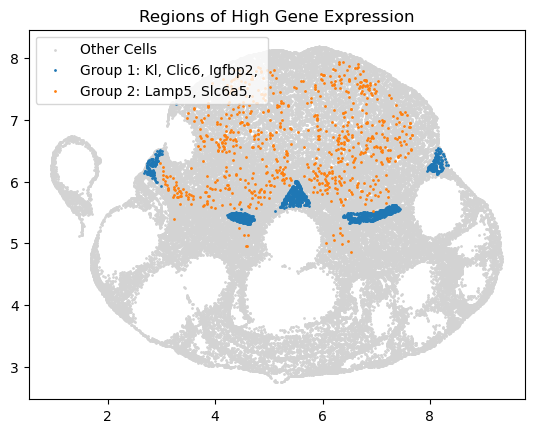

In [26]:
# Assuming 'x', 'y', and 'z' are column names in sample.obs for the spatial coordinates
x_coordinates = sample.obs[['x']]
y_coordinates = sample.obs[['y']]

# Determine the bounds for your plots
x_min, x_max = x_coordinates.min().iloc[0], x_coordinates.max().iloc[0]
y_min, y_max = y_coordinates.min().iloc[0], y_coordinates.max().iloc[0]

# Step 1: Identify the column index of the gene

coord_masks = []
all_cells_mask = np.ones(cell_count, dtype=bool)
coord_masks.append(all_cells_mask)

group_names = []
group_names.append('Other Cells')

for group in set_of_groups:
  group_number = set_of_groups.index(group) + 1
  group_name = 'Group ' + str(group_number) + ': '
  group_union = np.zeros(cell_count, dtype=bool)

  for gene_index in group:
    group_union = np.logical_or.reduce([group_union, gene_masks[gene_index]])
    group_name = group_name + gene_names[gene_index] + ', '

  group_names.append(group_name)
  coord_masks.append(group_union)


group_values = list(range(len(group_names)))

# Plot each set of points
for i, coord_mask in enumerate(coord_masks):
  filtered_x_coordinates = x_coordinates[coord_mask]
  filtered_y_coordinates = y_coordinates[coord_mask]
  if i == 0:
    plt.scatter(filtered_x_coordinates, filtered_y_coordinates, label=group_names[i], s=1, c="lightgray")
  else:
    plt.scatter(filtered_x_coordinates, filtered_y_coordinates, label=group_names[i], s=1)

# Optional: Add legend, title, and labels
plt.legend()
plt.title('Regions of High Gene Expression')

# Show plot
plt.show()